In [1]:
# Add the libraies path to python
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..\\python\\database'))
sys.path.append(os.path.join(os.getcwd(), '..\\python\\plots'))
sys.path.append(os.path.join(os.getcwd(), '..\\python\\charts'))

# Library imports
import database
import roster_plots
import roster_charts
import performance_plots
#import activity_plots
import score_plots
import draft_charts

In [2]:
# Constants to use in this notebook
season = "2023"
# Build the database for the season
db = database.database(season)

2023 Scores


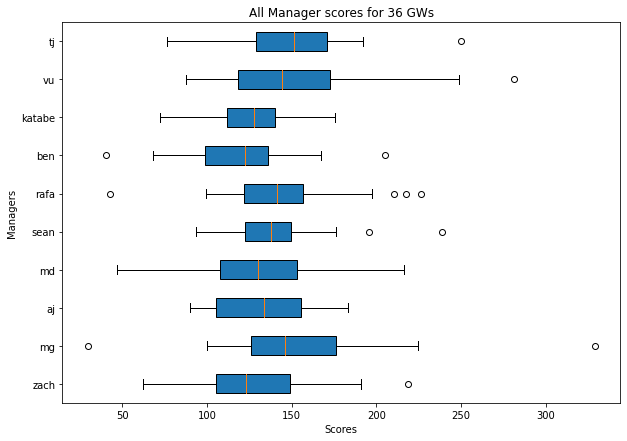

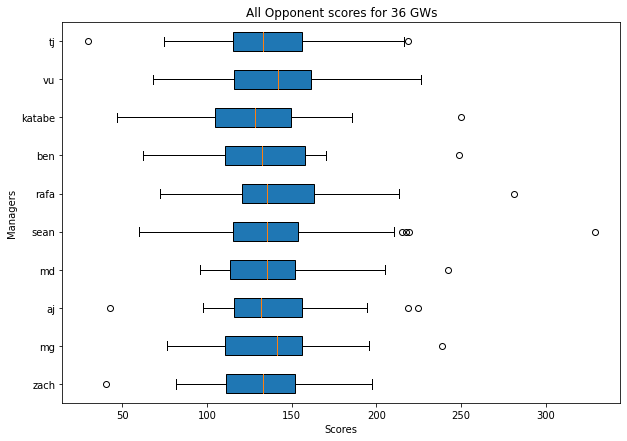

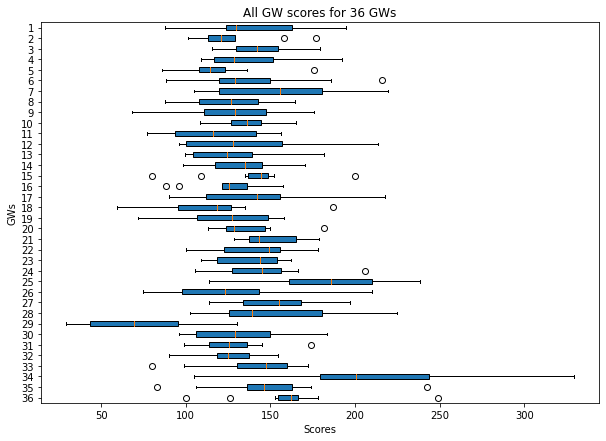

In [3]:
print(db.get_season(), "Scores")
score_plots.plot_manager_scores(db)
score_plots.plot_opponent_scores(db)
score_plots.plot_gw_scores(db)

2023 Performances


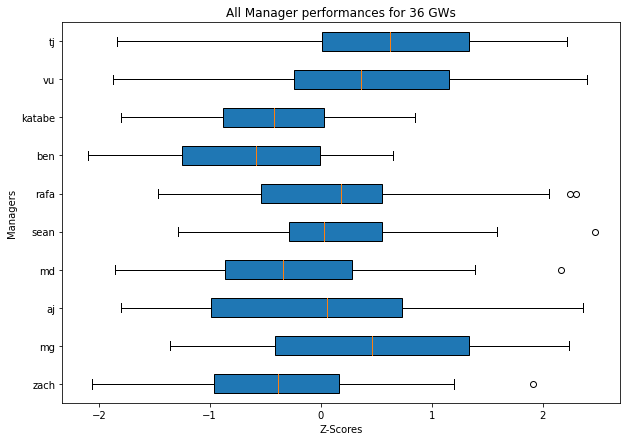

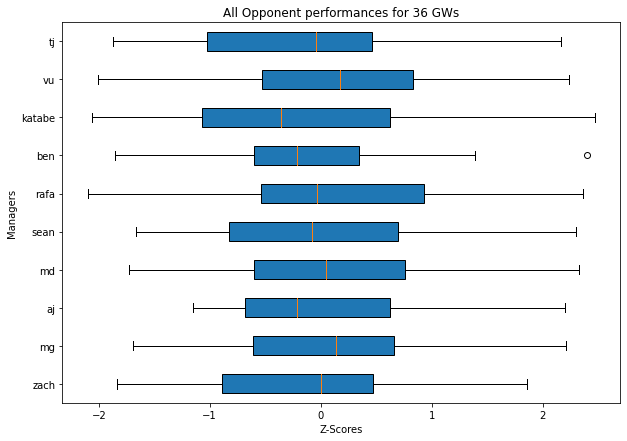

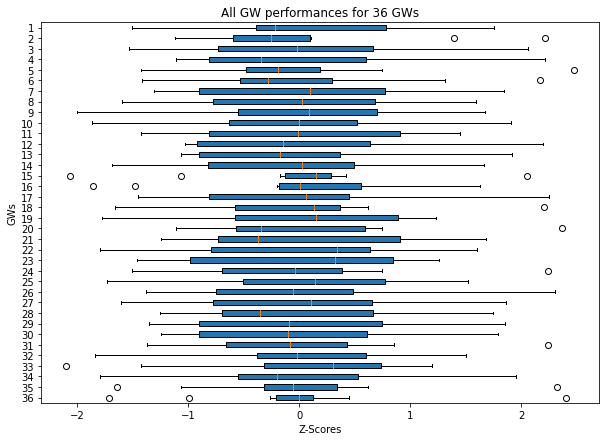

In [4]:
print(db.get_season(), "Performances")
performance_plots.plot_manager_performances(db)
performance_plots.plot_opponent_performances(db)
performance_plots.plot_gw_performances(db)

2023 Roster Contributions
+---------+-----------------------+----------------+--------------+---------------+---------------+
| Manager | Most Impactful Player | % Contribution | Total Points | Total Minutes | Points per 90 |
+---------+-----------------------+----------------+--------------+---------------+---------------+
|   zach  |    Phil Foden (MCI)   |     12.87      |    643.5     |      2850     |     20.32     |
|    mg   | Bruno Fernandes (MUN) |     10.91      |    648.0     |      3117     |     18.71     |
|    aj   |   Pascal Gross (BHA)  |      11.5      |    578.0     |      3080     |     16.89     |
|    md   |   Bukayo Saka (ARS)   |     13.72      |    667.0     |      2853     |     21.04     |
|   sean  |  Mohamed Salah (LIV)  |      10.9      |    570.5     |      2515     |     20.42     |
|   rafa  |   Declan Rice (ARS)   |      9.43      |    518.5     |      3222     |     14.48     |
|   ben   |  William Saliba (ARS) |      8.65      |    390.5     |      2

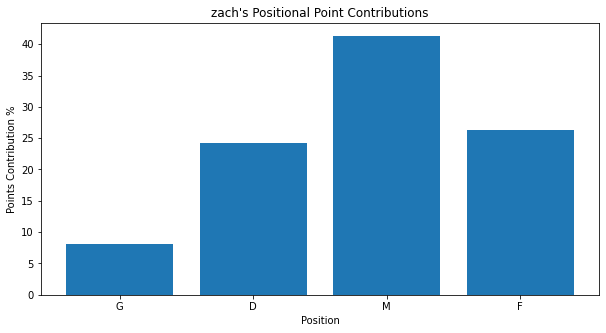

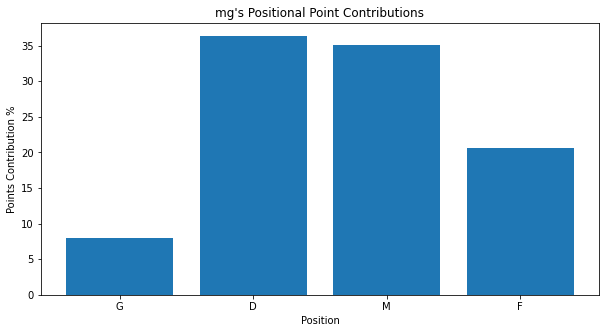

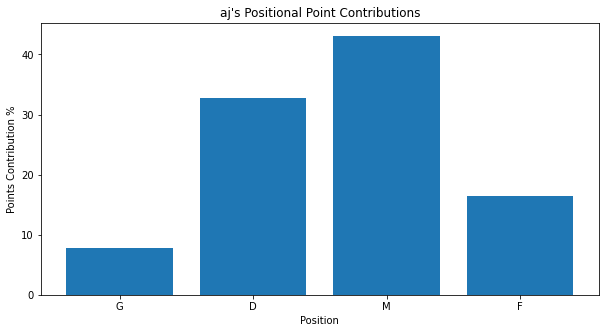

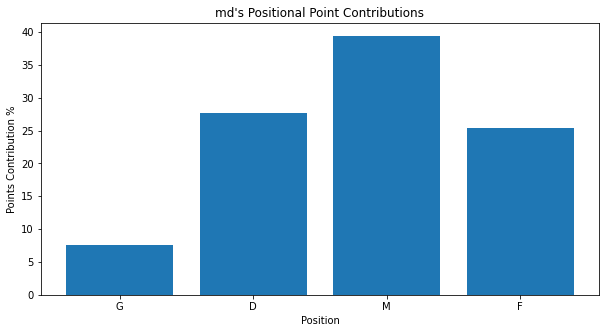

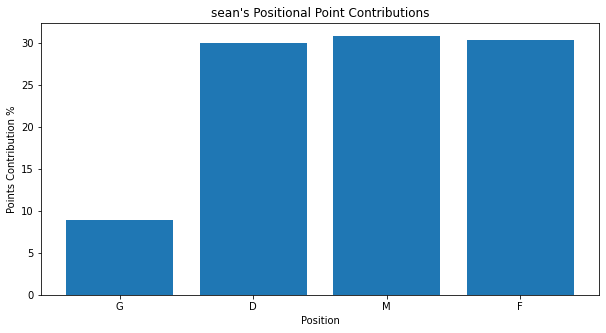

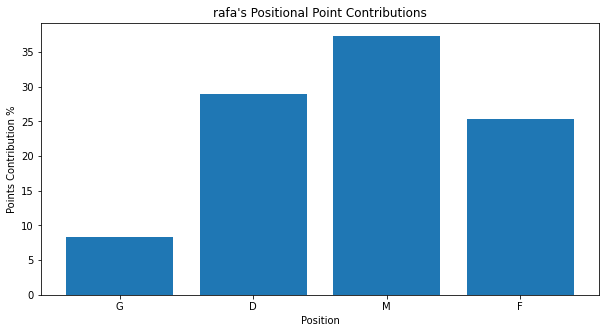

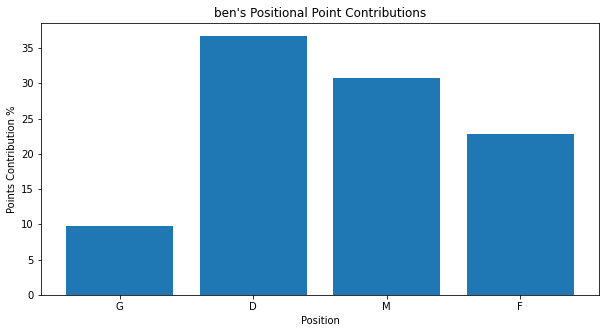

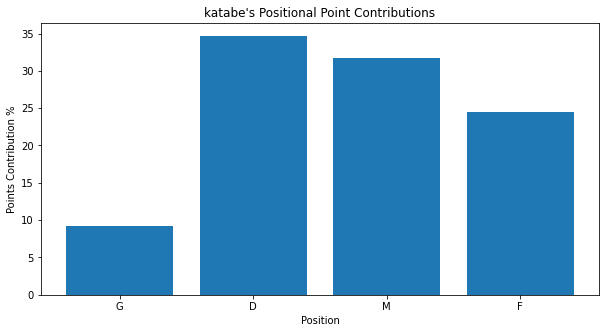

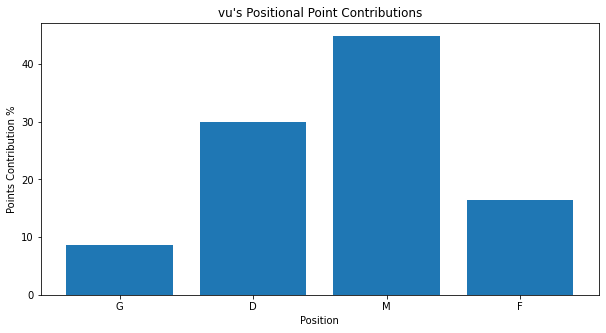

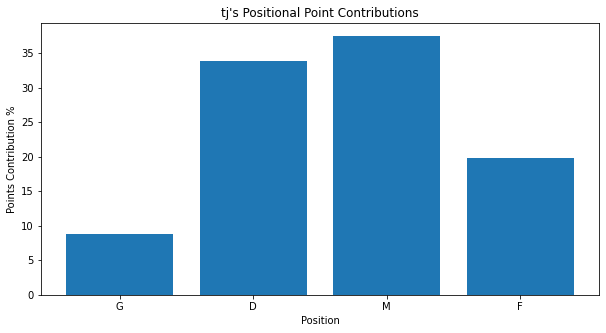

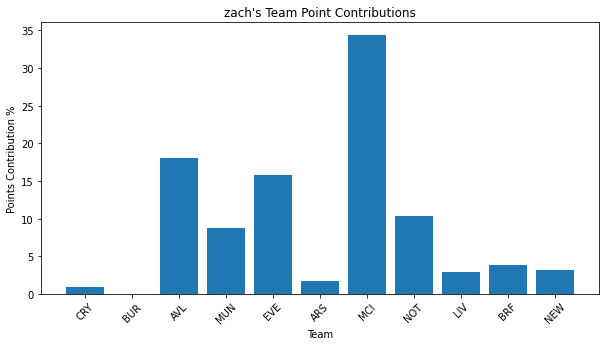

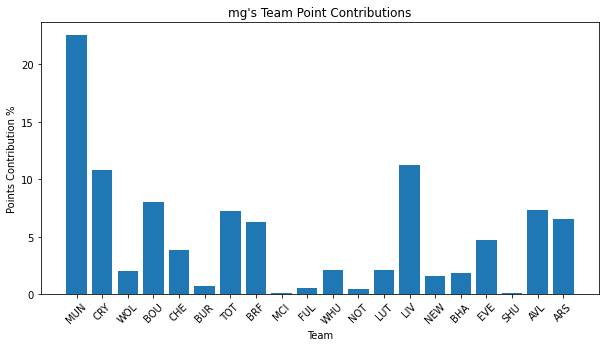

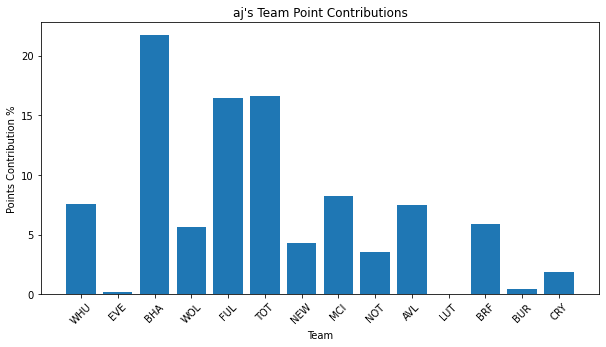

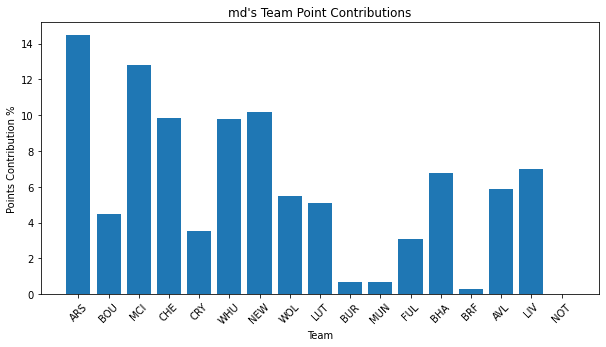

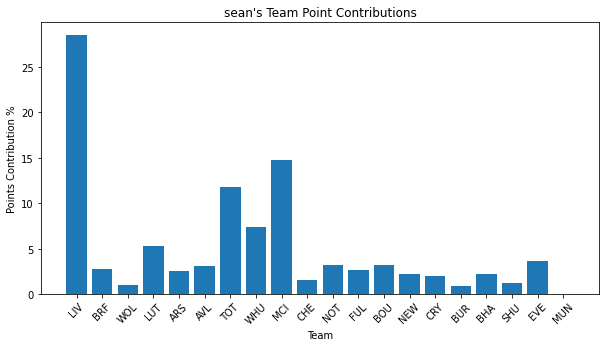

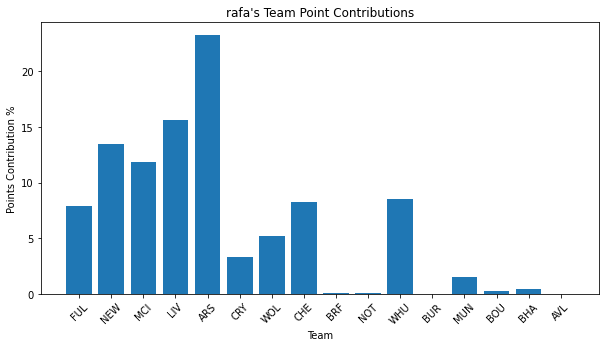

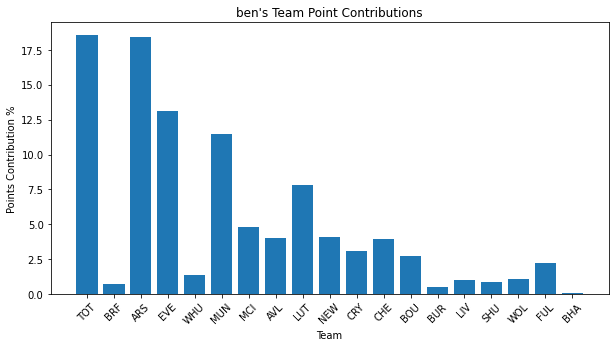

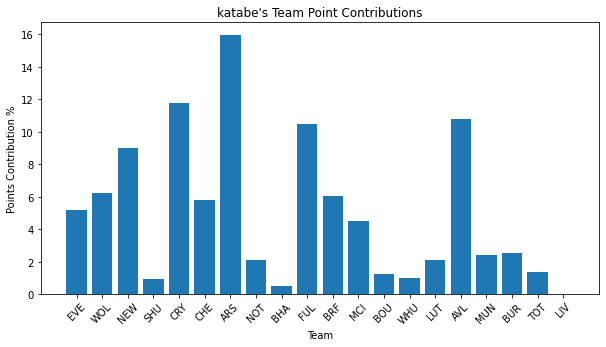

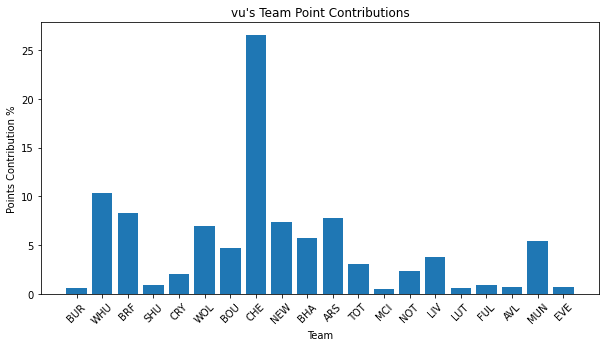

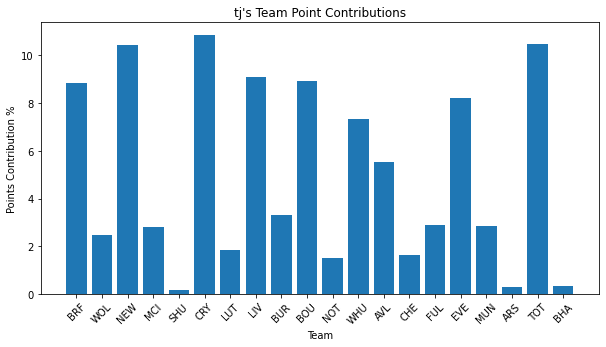

In [5]:
print(db.get_season(), "Roster Contributions")
# Chart the contributions for the season
roster_charts.chart_roster_contributions_for_players(db)
roster_charts.chart_roster_contributions_for_teams(db)
# Plot the contributions for the season
roster_plots.plot_roster_scores_by_position(db)
roster_plots.plot_roster_scores_by_team(db)

In [6]:
print(db.get_season(), "Positional Contributions")
# Chart the contributions for the season
roster_charts.chart_postitional_contributions(db)

2023 Positional Contributions
+----------+----------------+--------------+
| Position | % Contribution | Total Points |
+----------+----------------+--------------+
|    M     |     37.31      |   19597.5    |
|    D     |     31.53      |   16563.5    |
|    F     |     22.66      |   11902.0    |
|    G     |      8.51      |    4468.5    |
+----------+----------------+--------------+


In [7]:
print(db.get_season(), "Team Contributions")
# Chart the contributions for the season
roster_charts.chart_team_contributions(db)

2023 Team Contributions
+------+----------------+--------------+
| Team | % Contribution | Total Points |
+------+----------------+--------------+
| MCI  |      9.17      |   4815.75    |
| ARS  |      8.85      |   4649.25    |
| LIV  |      8.2       |   4306.25    |
| TOT  |      6.82      |   3581.25    |
| NEW  |      6.62      |    3479.5    |
| CHE  |      6.36      |   3339.75    |
| AVL  |      6.13      |   3219.75    |
| MUN  |      5.74      |    3013.5    |
| WHU  |      5.68      |   2981.75    |
| CRY  |      5.14      |    2700.0    |
| EVE  |      5.03      |   2640.75    |
| FUL  |      4.57      |    2402.5    |
| BRF  |      4.47      |    2348.5    |
| BHA  |      3.92      |    2061.0    |
| WOL  |      3.63      |   1904.75    |
| BOU  |      3.54      |    1861.0    |
| LUT  |      2.38      |   1250.75    |
| NOT  |      2.34      |    1231.5    |
| BUR  |      0.99      |    520.25    |
| SHU  |      0.43      |    223.75    |
+------+----------------+--------

In [8]:
print(db.get_season(), "Drafts")
# Plot the performances for the season
draft_charts.chart_draft_most_least_impact(db)
draft_charts.chart_draft_most_least_effective(db)
draft_charts.chart_draft_most_least_active(db)
draft_charts.chart_draft_impacts(db)

2023 Drafts
+-------+------------------------------------------------------------+------------------------------------------------------------+
| Round |                        Most Impact                         |                        Least Impact                        |
+-------+------------------------------------------------------------+------------------------------------------------------------+
|   1   |    +---------+----------+-------------+--------------+     |        +---------+----------+------+--------------+        |
|       |    | Drafter | Position |     Name    | Total Points |     |        | Drafter | Position | Name | Total Points |        |
|       |    +---------+----------+-------------+--------------+     |        +---------+----------+------+--------------+        |
|       |    |    md   |    M     | Bukayo Saka |    667.0     |     |        |    vu   |    -     |  -   |      -       |        |
|       |    +---------+----------+-------------+--------------+

2023 Activity


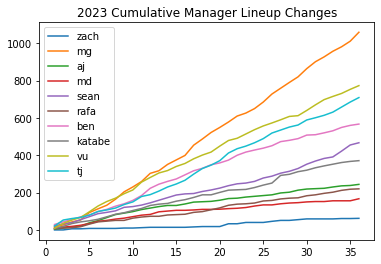

In [24]:
print(db.get_season(), "Activity")
# Plot the manager activity for the season

import pandas as pd

number_of_gws = db.get_number_of_gws()
managers = db.get_managers()
manager_activity = dict()
for name in managers:
    manager_activity[name] = dict()
    
x_axis = list()
for gw_index in range(number_of_gws):
    gw = gw_index + 1
    x_axis.append(gw)
    for name in managers:
        
        manager_lineup_changes = db.get_manager_activity_reader(name).get_lineup_changes()
        manager_lineup_changes_for_gw = 0
        if(gw in manager_lineup_changes.keys()):
            manager_lineup_changes_for_gw = len(manager_lineup_changes[gw])
        
        manager_lineup_changes_for_gw = 0
        if(gw in manager_lineup_changes.keys()):
            manager_lineup_changes_for_gw = len(manager_lineup_changes[gw])
            
        if(gw > 1):
            prev_manager_lineup_changes_for_gw = manager_activity[name][gw - 1]
            manager_activity[name][gw] = manager_lineup_changes_for_gw + prev_manager_lineup_changes_for_gw
        else:
            manager_activity[name][gw] = manager_lineup_changes_for_gw
            
        # manager_activity[name][gw] = manager_lineup_changes_for_gw
        
    
df = pd.DataFrame(data=manager_activity)
df.head()    
df.plot(title = db.get_season() + ' Cumulative Manager Lineup Changes');

2023 Activity


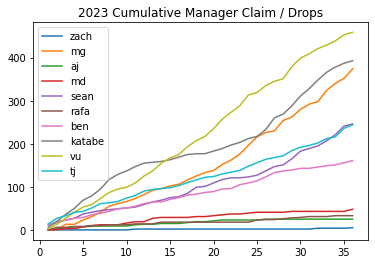

In [25]:
print(db.get_season(), "Activity")
# Plot the manager activity for the season

import pandas as pd

number_of_gws = db.get_number_of_gws()
managers = db.get_managers()
manager_activity = dict()
for name in managers:
    manager_activity[name] = dict()
    
x_axis = list()
for gw_index in range(number_of_gws):
    gw = gw_index + 1
    x_axis.append(gw)
    for name in managers:
        
        manager_lineup_changes = db.get_manager_activity_reader(name).get_claims_drops()
        manager_lineup_changes_for_gw = 0
        if(gw in manager_lineup_changes.keys()):
            manager_lineup_changes_for_gw = len(manager_lineup_changes[gw])
        
        manager_lineup_changes_for_gw = 0
        if(gw in manager_lineup_changes.keys()):
            manager_lineup_changes_for_gw = len(manager_lineup_changes[gw])
            
        if(gw > 1):
            prev_manager_lineup_changes_for_gw = manager_activity[name][gw - 1]
            manager_activity[name][gw] = manager_lineup_changes_for_gw + prev_manager_lineup_changes_for_gw
        else:
            manager_activity[name][gw] = manager_lineup_changes_for_gw
            
        # manager_activity[name][gw] = manager_lineup_changes_for_gw
        
    
df = pd.DataFrame(data=manager_activity)
df.head()    
df.plot(title = db.get_season() + ' Cumulative Manager Claim / Drops');